hc3.txt: (43, 43)


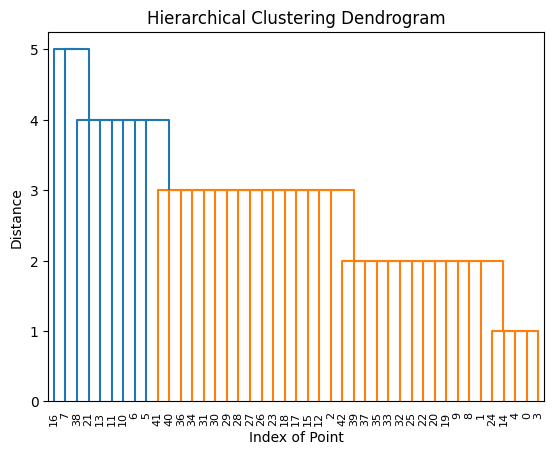

Size of the tree from hc3.txt: 116
Time needed: 0.5500 seconds
----------------------------------------------------------------------------------------------------
matrix3.txt: (4, 4)


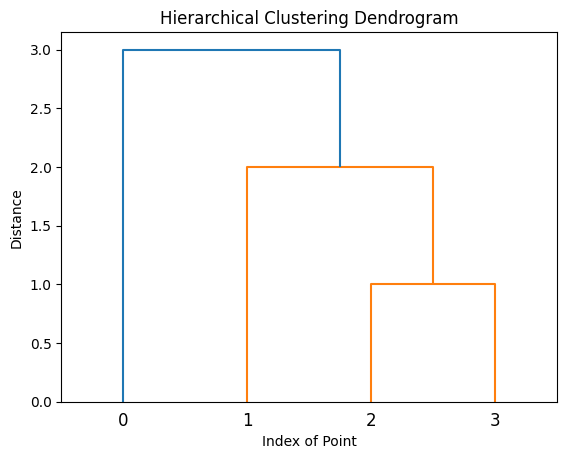

Size of the tree from matrix3.txt: 6
Time needed: 0.2036 seconds
----------------------------------------------------------------------------------------------------
mst6.txt: (29, 29)


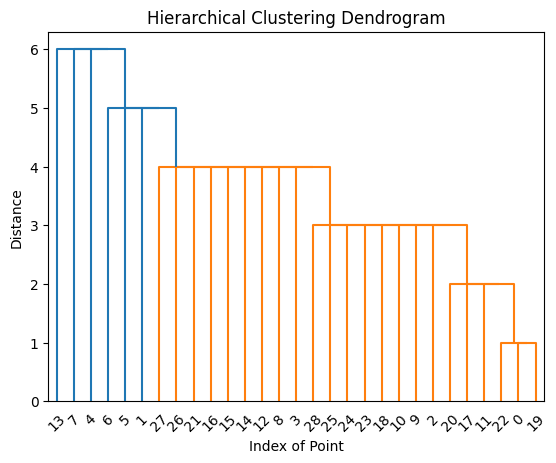

Size of the tree from mst6.txt: 101
Time needed: 0.4532 seconds
----------------------------------------------------------------------------------------------------
matrix8.txt: (5, 5)


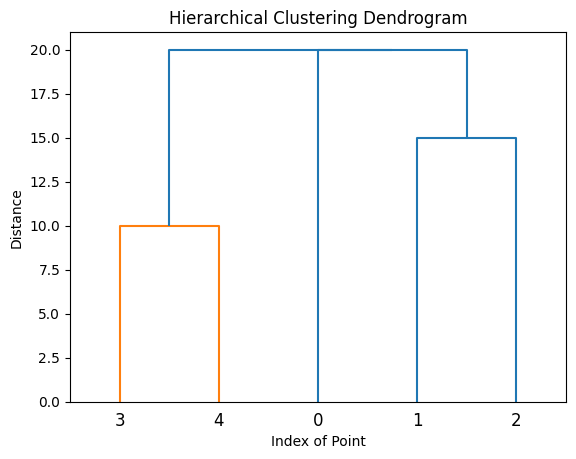

Size of the tree from matrix8.txt: 65
Time needed: 0.2140 seconds
----------------------------------------------------------------------------------------------------
matrix5.txt: (5, 5)


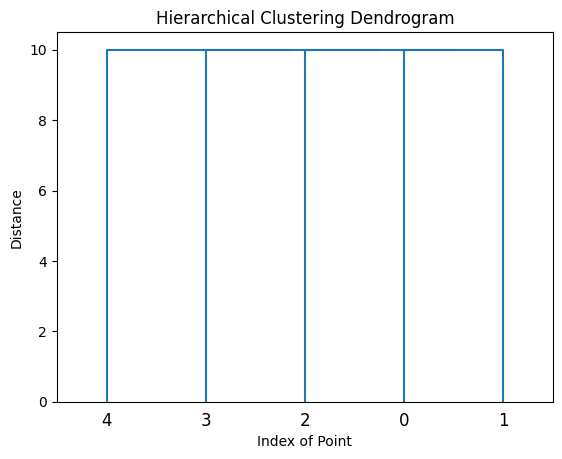

Size of the tree from matrix5.txt: 40
Time needed: 0.2103 seconds
----------------------------------------------------------------------------------------------------
hc2.txt: (40, 40)


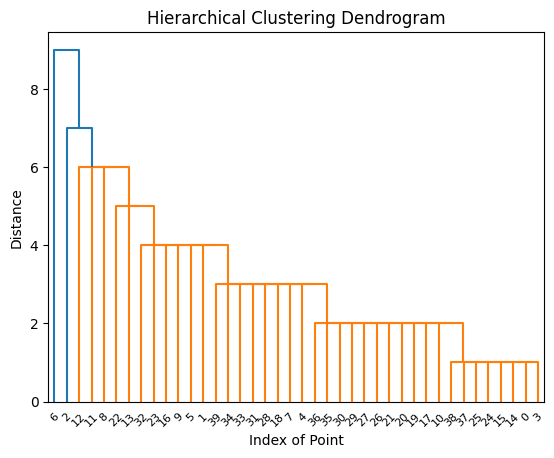

Size of the tree from hc2.txt: 121
Time needed: 0.6376 seconds
----------------------------------------------------------------------------------------------------
matrix6.txt: (3, 3)


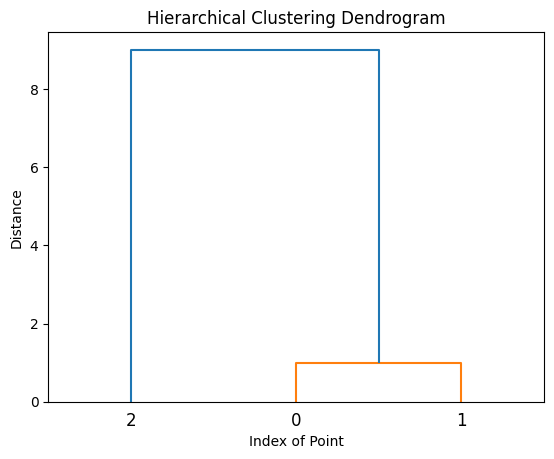

Size of the tree from matrix6.txt: 10
Time needed: 0.3256 seconds
----------------------------------------------------------------------------------------------------
matrix1.txt: (3, 3)


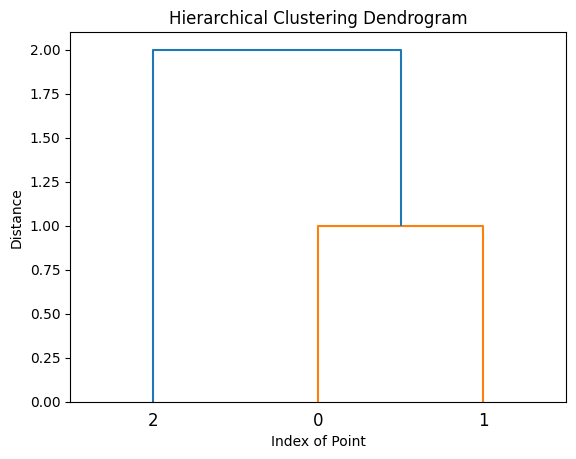

Size of the tree from matrix1.txt: 3
Time needed: 0.2119 seconds
----------------------------------------------------------------------------------------------------
hc1.txt: (38, 38)


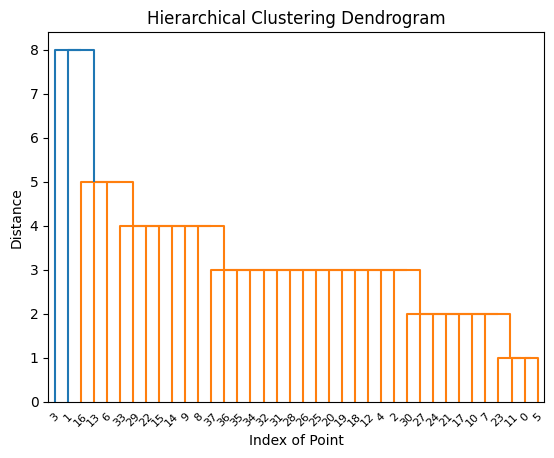

Size of the tree from hc1.txt: 121
Time needed: 0.5693 seconds
----------------------------------------------------------------------------------------------------
mst2.txt: (24, 24)


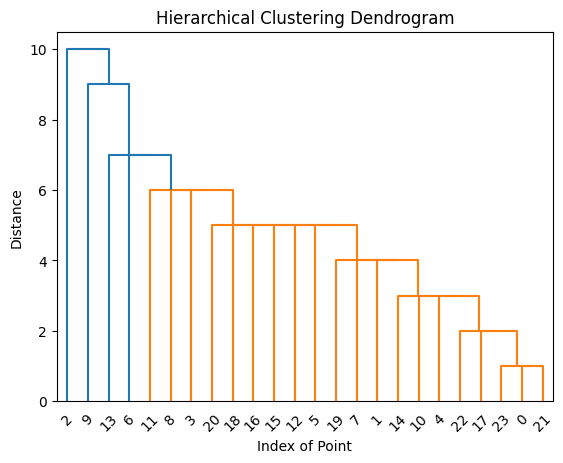

Size of the tree from mst2.txt: 108
Time needed: 0.4024 seconds
----------------------------------------------------------------------------------------------------
matrix2.txt: (4, 4)


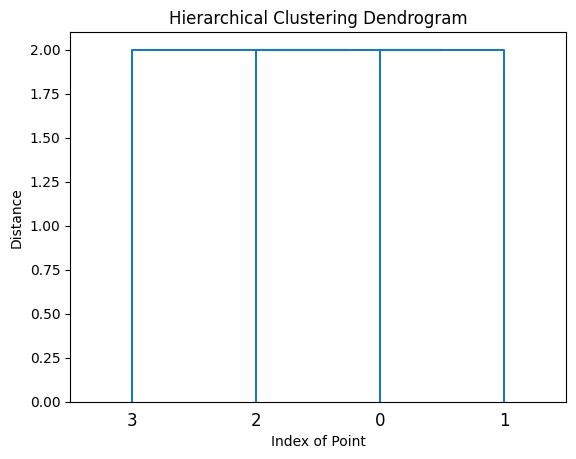

Size of the tree from matrix2.txt: 6
Time needed: 0.2238 seconds
----------------------------------------------------------------------------------------------------
matrix4.txt: (5, 5)


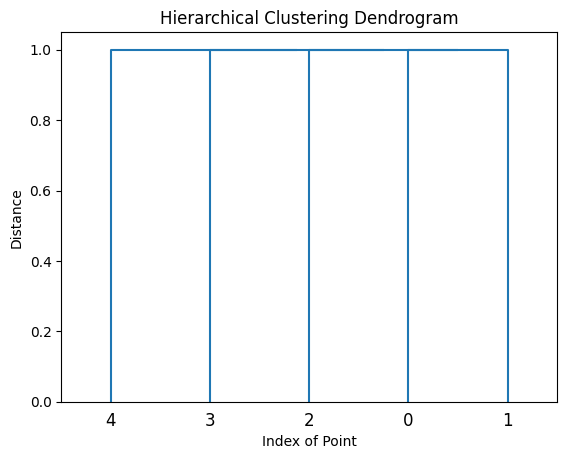

Size of the tree from matrix4.txt: 4
Time needed: 0.2190 seconds
----------------------------------------------------------------------------------------------------
hc4.txt: (50, 50)


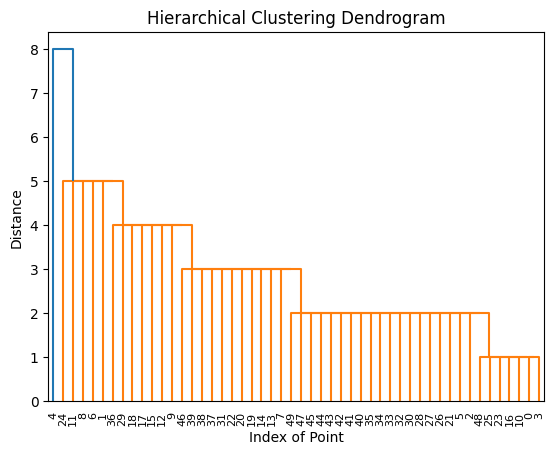

Size of the tree from hc4.txt: 138
Time needed: 0.6486 seconds
----------------------------------------------------------------------------------------------------
mst7.txt: (31, 31)


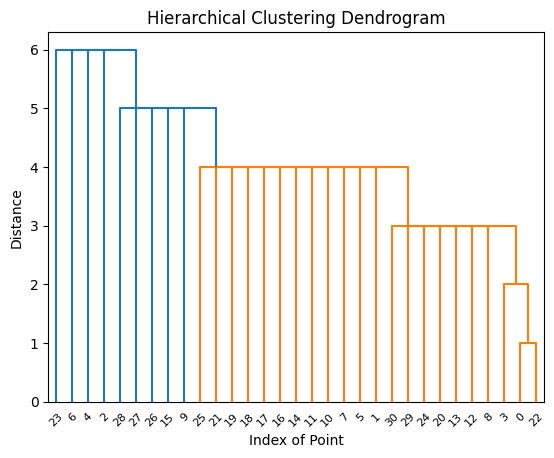

Size of the tree from mst7.txt: 121
Time needed: 0.4101 seconds
----------------------------------------------------------------------------------------------------
mst5.txt: (26, 26)


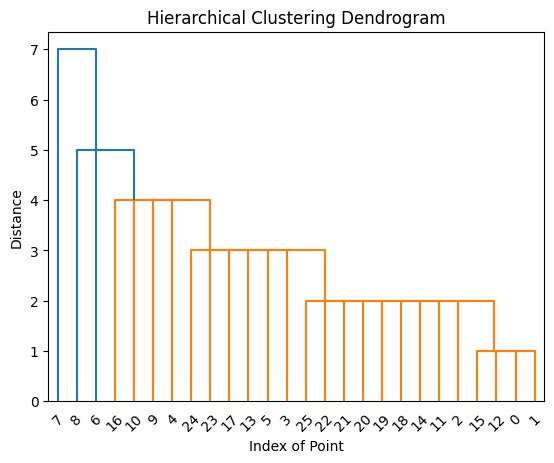

Size of the tree from mst5.txt: 72
Time needed: 0.3851 seconds
----------------------------------------------------------------------------------------------------
matrix7.txt: (3, 3)


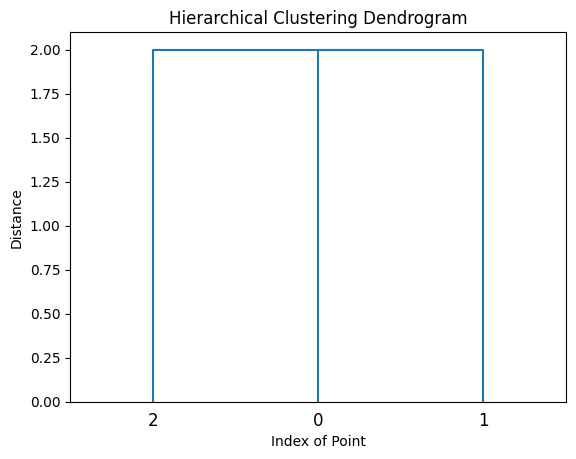

Size of the tree from matrix7.txt: 4
Time needed: 0.2345 seconds
----------------------------------------------------------------------------------------------------
mst1.txt: (9, 9)


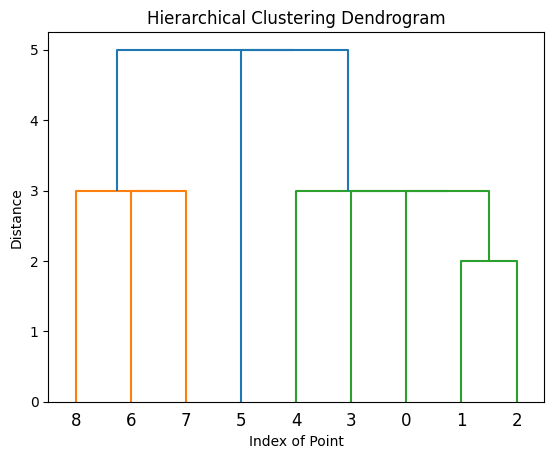

Size of the tree from mst1.txt: 27
Time needed: 0.2618 seconds
----------------------------------------------------------------------------------------------------
mst4.txt: (21, 21)


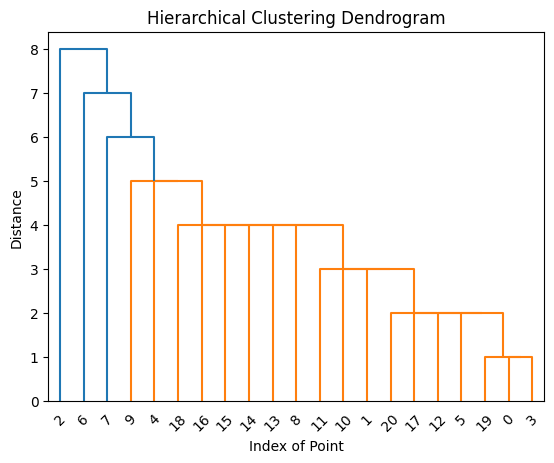

Size of the tree from mst4.txt: 74
Time needed: 0.4756 seconds
----------------------------------------------------------------------------------------------------
mst3.txt: (12, 12)


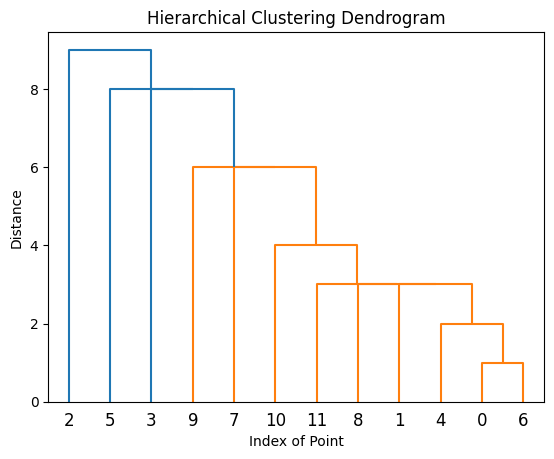

Size of the tree from mst3.txt: 53
Time needed: 0.3020 seconds
----------------------------------------------------------------------------------------------------


In [46]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, to_tree
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import os
import time

def load_matrices_from_directory(directory_path):
    matrix_files = {}

    for filename in os.listdir(directory_path):
        if filename.startswith(("mst", "matrix", "hc")) and filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            matrix = pd.read_csv(file_path, header=None, delim_whitespace=True).values
            matrix_files[filename] = matrix
    return matrix_files

def build_ultrametric_tree(distance_matrix):
    if distance_matrix.shape[0] == distance_matrix.shape[1] and np.all(distance_matrix == distance_matrix.T):
        condensed_matrix = squareform(distance_matrix)
    else:
        condensed_matrix = distance_matrix 

    linkage_matrix = linkage(condensed_matrix, method='single')

    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Index of Point')
    plt.ylabel('Distance')
    plt.show()

    root_node, node_list = to_tree(linkage_matrix, rd=True)
    
    tree_size = np.sum(linkage_matrix[:, 2])
    
    return tree_size, root_node

directory_path = '../minimum-size-ultrametric-tree/tests/'
matrices = load_matrices_from_directory(directory_path)
for name, matrix in matrices.items():
    print(f"{name}: {matrix.shape}")
    start_time = time.time()
    tree_size, tree_root = build_ultrametric_tree(matrix)
    end_time = time.time()

    elapsed_time = end_time - start_time
    
    print(f"Size of the tree from {name}: {int(tree_size)}")
    print("Time needed: {:.4f} seconds".format(end_time - start_time))
    print("-" * 100)


